In [1]:
!pip install pyforest

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import numpy as np
import pandas as pd

In [3]:
data=pd.read_csv('train.csv')
data

<IPython.core.display.Javascript object>

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
data.sum()

C:\Users\Ravan\AppData\Local\Temp\ipykernel_16948\1263598667.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.sum()


PassengerId                                               397386
Survived                                                     342
Pclass                                                      2057
Name           Braund, Mr. Owen HarrisCumings, Mrs. John Brad...
Sex            malefemalefemalefemalemalemalemalemalefemalefe...
Age                                                     21205.17
SibSp                                                        466
Parch                                                        340
Ticket         A/5 21171PC 17599STON/O2. 31012821138033734503...
Fare                                                  28693.9493
dtype: object

In [9]:
data.shape

(891, 12)

In [10]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [12]:
data.rename({'Sex':'Gender'},axis=1,inplace=True)
data

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [13]:
s=data.drop(['Cabin','Pclass','SibSp'],axis=1,inplace=True)
data

,PassengerId,Survived,Name,Gender,Age,Parch,Ticket,Fare,Embarked
0,1,0,"Braund, Mr. Owen Harris",male,22.0,0,A/5 21171,7.2500,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,0,PC 17599,71.2833,C
2,3,1,"Heikkinen, Miss. Laina",female,26.0,0,STON/O2. 3101282,7.9250,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,0,113803,53.1000,S
4,5,0,"Allen, Mr. William Henry",male,35.0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",male,27.0,0,211536,13.0000,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,112053,30.0000,S
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,2,W./C. 6607,23.4500,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,111369,30.0000,C


In [14]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
data['Gender']=label_encoder.fit_transform(data['Gender'])
data['Gender'].value_counts()



1    577
0    314
Name: Gender, dtype: int64

In [15]:
data.count()

PassengerId    891
Survived       891
Name           891
Gender         891
Age            714
Parch          891
Ticket         891
Fare           891
Embarked       889
dtype: int64

In [16]:
data

,PassengerId,Survived,Name,Gender,Age,Parch,Ticket,Fare,Embarked
0,1,0,"Braund, Mr. Owen Harris",1,22.0,0,A/5 21171,7.2500,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,0,PC 17599,71.2833,C
2,3,1,"Heikkinen, Miss. Laina",0,26.0,0,STON/O2. 3101282,7.9250,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,0,113803,53.1000,S
4,5,0,"Allen, Mr. William Henry",1,35.0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",1,27.0,0,211536,13.0000,S
887,888,1,"Graham, Miss. Margaret Edith",0,19.0,0,112053,30.0000,S
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,2,W./C. 6607,23.4500,S
889,890,1,"Behr, Mr. Karl Howell",1,26.0,0,111369,30.0000,C


In [17]:
data['Age'].median()

28.0

In [18]:
data['Age'].fillna(value=27,inplace=True)

In [19]:
data['Age'].isnull().sum()

0

In [20]:
data.isnull().sum()

PassengerId    0
Survived       0
Name           0
Gender         0
Age            0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [21]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [22]:
k=data.groupby('Survived')
k['Embarked'].value_counts()

Survived  Embarked
0         S           427
          C            75
          Q            47
1         S           217
          C            93
          Q            30
Name: Embarked, dtype: int64

In [23]:
# i think not use for this syntax in Embarked column because no null values.
# data['Embarked'].fillna(value='k',inplace=True)
# data

In [24]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
data['Embarked']=label_encoder.fit_transform(data['Embarked'])
data['Embarked'].value_counts()                                         
                                             

2    644
0    168
1     77
3      2
Name: Embarked, dtype: int64

In [25]:
data

,PassengerId,Survived,Name,Gender,Age,Parch,Ticket,Fare,Embarked
0,1,0,"Braund, Mr. Owen Harris",1,22.0,0,A/5 21171,7.2500,2
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,0,PC 17599,71.2833,0
2,3,1,"Heikkinen, Miss. Laina",0,26.0,0,STON/O2. 3101282,7.9250,2
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,0,113803,53.1000,2
4,5,0,"Allen, Mr. William Henry",1,35.0,0,373450,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",1,27.0,0,211536,13.0000,2
887,888,1,"Graham, Miss. Margaret Edith",0,19.0,0,112053,30.0000,2
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",0,27.0,2,W./C. 6607,23.4500,2
889,890,1,"Behr, Mr. Karl Howell",1,26.0,0,111369,30.0000,0


In [26]:
data.isnull().sum()

PassengerId    0
Survived       0
Name           0
Gender         0
Age            0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [27]:
data['Fare'].median()

14.4542

In [28]:
data['Fare'].fillna(value=14.4542,inplace=True)
data

,PassengerId,Survived,Name,Gender,Age,Parch,Ticket,Fare,Embarked
0,1,0,"Braund, Mr. Owen Harris",1,22.0,0,A/5 21171,7.2500,2
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,0,PC 17599,71.2833,0
2,3,1,"Heikkinen, Miss. Laina",0,26.0,0,STON/O2. 3101282,7.9250,2
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,0,113803,53.1000,2
4,5,0,"Allen, Mr. William Henry",1,35.0,0,373450,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",1,27.0,0,211536,13.0000,2
887,888,1,"Graham, Miss. Margaret Edith",0,19.0,0,112053,30.0000,2
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",0,27.0,2,W./C. 6607,23.4500,2
889,890,1,"Behr, Mr. Karl Howell",1,26.0,0,111369,30.0000,0


In [29]:
data['Fare'].isnull().sum()

0

In [30]:
data.isnull().sum()

PassengerId    0
Survived       0
Name           0
Gender         0
Age            0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib import figure
style.use('fivethirtyeight')

C:\Users\Ravan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


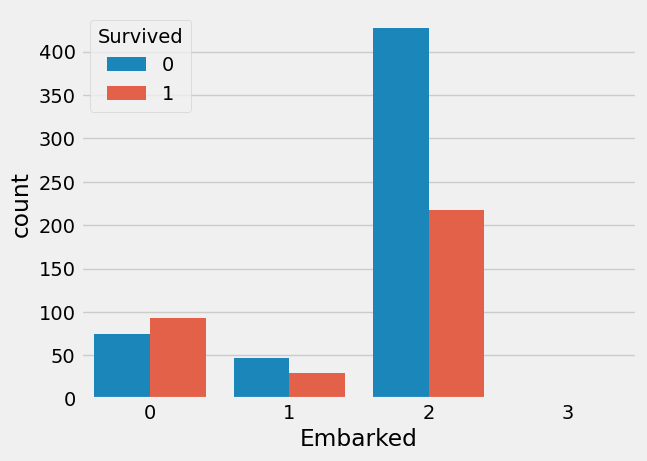

In [32]:
sns.countplot(data['Embarked'],hue=data['Survived'])
plt.show()

In [33]:
data

,PassengerId,Survived,Name,Gender,Age,Parch,Ticket,Fare,Embarked
0,1,0,"Braund, Mr. Owen Harris",1,22.0,0,A/5 21171,7.2500,2
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,0,PC 17599,71.2833,0
2,3,1,"Heikkinen, Miss. Laina",0,26.0,0,STON/O2. 3101282,7.9250,2
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,0,113803,53.1000,2
4,5,0,"Allen, Mr. William Henry",1,35.0,0,373450,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",1,27.0,0,211536,13.0000,2
887,888,1,"Graham, Miss. Margaret Edith",0,19.0,0,112053,30.0000,2
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",0,27.0,2,W./C. 6607,23.4500,2
889,890,1,"Behr, Mr. Karl Howell",1,26.0,0,111369,30.0000,0


In [34]:
data.corr()

,PassengerId,Survived,Gender,Age,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,0.042939,0.034759,-0.001652,0.012658,0.013083
Survived,-0.005007,1.000000,-0.543351,-0.061956,0.081629,0.257307,-0.163517
Gender,0.042939,-0.543351,1.000000,0.079306,-0.245489,-0.182333,0.104057
Age,0.034759,-0.061956,0.079306,1.000000,-0.168329,0.099571,-0.009475
Parch,-0.001652,0.081629,-0.245489,-0.168329,1.000000,0.216225,0.038322
Fare,0.012658,0.257307,-0.182333,0.099571,0.216225,1.000000,-0.221226
Embarked,0.013083,-0.163517,0.104057,-0.009475,0.038322,-0.221226,1.000000


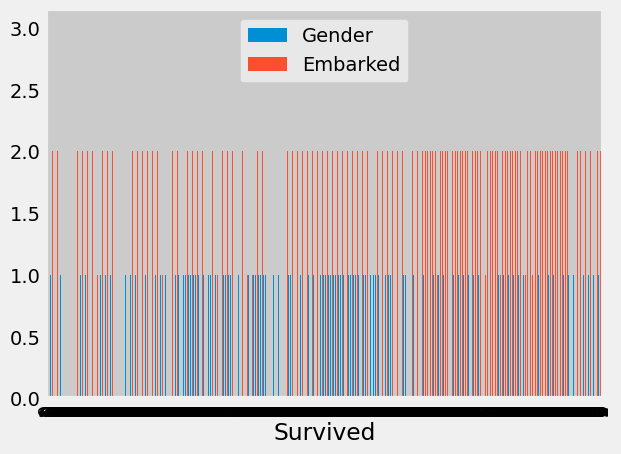

In [35]:
data.plot(x='Survived',y=['Gender','Embarked'],kind='bar')
plt.show()

In [36]:
correlation=data.corr()
correlation['Survived'].sort_values(ascending=False)


Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
Age           -0.061956
Embarked      -0.163517
Gender        -0.543351
Name: Survived, dtype: float64

<AxesSubplot:>

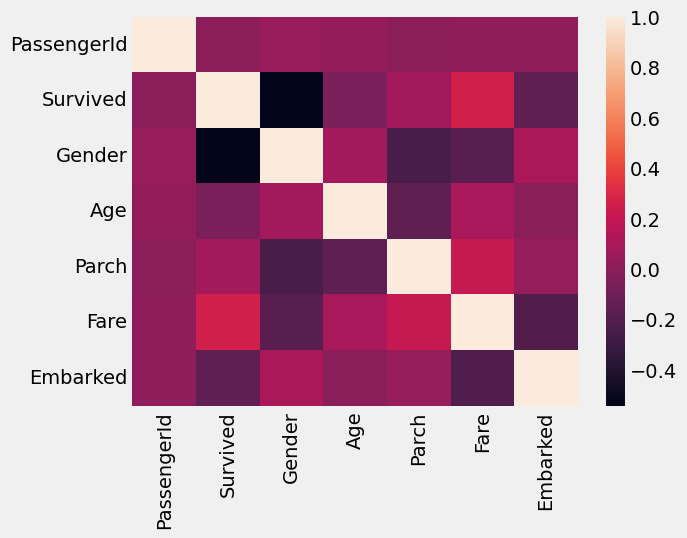

In [37]:
sns.heatmap(data.corr())

In [38]:
correlation['Fare'].sort_values(ascending=False)
correlation['Fare']

PassengerId    0.012658
Survived       0.257307
Gender        -0.182333
Age            0.099571
Parch          0.216225
Fare           1.000000
Embarked      -0.221226
Name: Fare, dtype: float64

In [39]:
data

,PassengerId,Survived,Name,Gender,Age,Parch,Ticket,Fare,Embarked
0,1,0,"Braund, Mr. Owen Harris",1,22.0,0,A/5 21171,7.2500,2
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,0,PC 17599,71.2833,0
2,3,1,"Heikkinen, Miss. Laina",0,26.0,0,STON/O2. 3101282,7.9250,2
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,0,113803,53.1000,2
4,5,0,"Allen, Mr. William Henry",1,35.0,0,373450,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",1,27.0,0,211536,13.0000,2
887,888,1,"Graham, Miss. Margaret Edith",0,19.0,0,112053,30.0000,2
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",0,27.0,2,W./C. 6607,23.4500,2
889,890,1,"Behr, Mr. Karl Howell",1,26.0,0,111369,30.0000,0


In [40]:
data['family']=data['Gender']+data['Embarked']+1
data=data.drop(['Embarked','Gender'],axis=1)
data=data.drop('Name',axis=1)
data=data.drop('Ticket',axis=1)
data

,PassengerId,Survived,Age,Parch,Fare,family
0,1,0,22.0,0,7.2500,4
1,2,1,38.0,0,71.2833,1
2,3,1,26.0,0,7.9250,3
3,4,1,35.0,0,53.1000,3
4,5,0,35.0,0,8.0500,4
...,...,...,...,...,...,...
886,887,0,27.0,0,13.0000,4
887,888,1,19.0,0,30.0000,3
888,889,0,27.0,2,23.4500,3
889,890,1,26.0,0,30.0000,2


In [41]:
data

,PassengerId,Survived,Age,Parch,Fare,family
0,1,0,22.0,0,7.2500,4
1,2,1,38.0,0,71.2833,1
2,3,1,26.0,0,7.9250,3
3,4,1,35.0,0,53.1000,3
4,5,0,35.0,0,8.0500,4
...,...,...,...,...,...,...
886,887,0,27.0,0,13.0000,4
887,888,1,19.0,0,30.0000,3
888,889,0,27.0,2,23.4500,3
889,890,1,26.0,0,30.0000,2


In [42]:
y=data.drop("Survived",axis=1).values
z=data["Survived"].values

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [44]:
x_train,x_test,y_train,y_test=train_test_split(y,z,test_size=0.3,random_state=100)
print(x_train)
print(y_train)

[[ 70.      26.       0.       8.6625   4.    ]
 [ 86.      33.       0.      15.85     3.    ]
 [795.      25.       0.       7.8958   4.    ]
 ...
 [836.      39.       1.      83.1583   1.    ]
 [793.      27.       2.      69.55     3.    ]
 [521.      30.       0.      93.5      3.    ]]
[0 1 0 1 0 1 1 0 0 1 0 0 0 0 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 0 0 0 1
 0 0 1 1 0 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1
 0 0 1 0 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0
 1 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0
 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 1 0
 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 1 1 1 0 0 1 1 1
 1 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 0 1
 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0
 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0
 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 

In [45]:
# first method, bro syntax
lr=LogisticRegression()
lr.fit(x_train,y_train)# sending data to train 70%
lrp=lr.predict(x_test)

In [46]:
accuracy_score(y_test,lrp)

0.667910447761194

In [47]:
# second method, own syntax
lr=LogisticRegression()
lr.fit(x_train,y_train)# sending data to train 70%

LogisticRegression()

In [48]:
accuracy_score(y_test,lr.predict(x_test))

0.667910447761194